1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

           label  features_1  features_2  features_3  features_4  features_5  \
0     -89.243497    2.175170   -0.285786   -0.603396   -0.627453   -0.686474   
1     230.050125    1.481941   -1.327870   -0.543583   -0.303578    1.552964   
2    -286.844411   -1.154394   -0.178649   -1.636646    0.239353   -0.684994   
3     364.552862    0.197665    1.455707    1.562205    2.168207    0.053335   
4     515.460006    0.596676    0.969860    1.294158   -0.404728    2.145297   
...          ...         ...         ...         ...         ...         ...   
1995 -328.100239   -1.820929    1.358539   -2.494838    0.828299    0.199255   
1996  -62.960036   -0.883712   -0.063687   -0.418704   -0.872601    0.363769   
1997  -90.262252   -0.021394   -0.312864   -0.730848   -1.341482   -0.720862   
1998  -74.333901   -0.041909   -0.862731   -1.232011    1.268843    0.093043   
1999    8.321454   -1.056364    0.259247    0.307835    1.094903    0.472395   

      features_6  features_7  features_

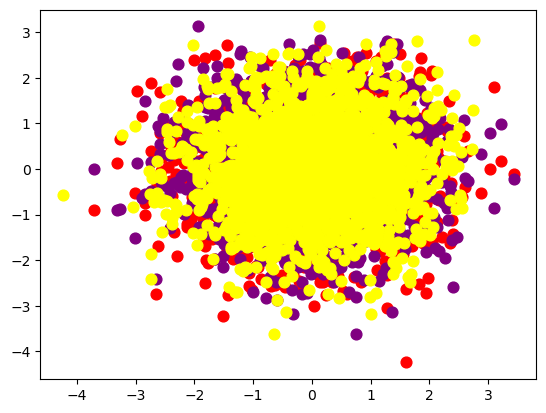

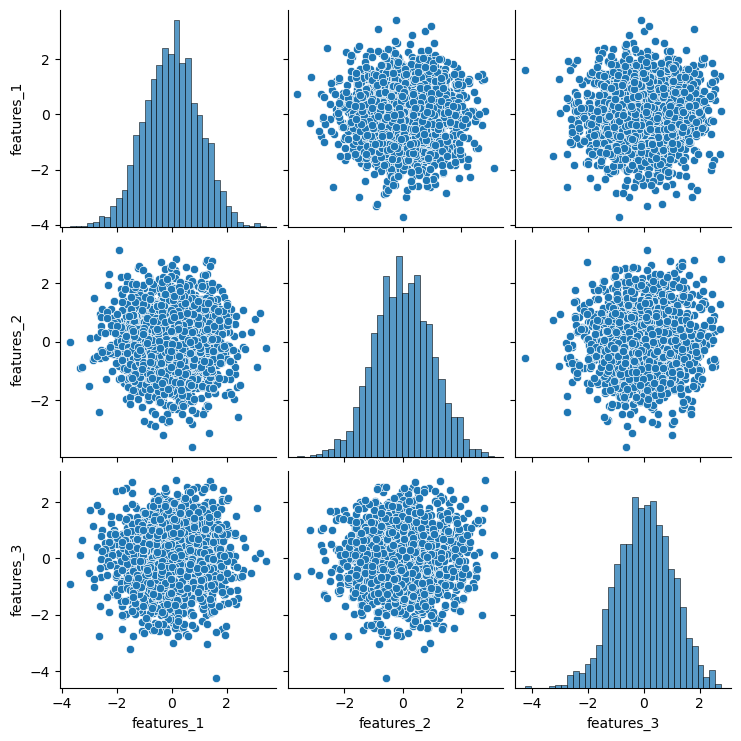

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

reg= pd.read_csv('/Users/demo/Downloads/regression_generated.csv')
print (reg)
r1=[]

features_1 = reg['features_1']

features_2 = reg['features_2']

features_3 = reg['features_3']
print("scatter plot of the features 1&3 shown in red colour",plt.scatter(reg.features_1, reg.features_3, s=60, c='red'))

print("scatter plot of the features 1&2 shown in purple colour",plt.scatter(reg.features_1, reg.features_2, s=60, c='purple'))


print("scatter plot of the features 3&2 shown in yellow colour",plt.scatter(reg.features_3, reg.features_2, s=60, c='yellow'))

a=0



df=reg[["features_1","features_2","features_3"]]
seaborn.pairplot(df)

while a <=2:
        if a==0:
            r1 = np.corrcoef(reg.features_1, reg.features_2)
            print("correlation between feaure1 and 2 is ")
        elif a==1:
            r1 = np.corrcoef(reg.features_1, reg.features_3)
            print("correlation between feaure1 and 3 is ")
        elif a==2:
            r1 = np.corrcoef(reg.features_3, reg.features_2)
            print("correlation between feaure3 and 2 is ")
        
        a=a+1
        r1=r1[0,1]
        if(r1==1):
            print(r1,"there is perfect positive linear relationship  ")     
        elif(r1>=0.5):   
            print(r1,"there is strong positive linear relationship ")
        elif(r1>=0.3):
            print(r1,"there is moderate positive linear relationship ")
        elif(r1>=0.0):
            print(r1,"there is week positive linear relationship ")    
        elif(r1==0):
            print(r1,"there is no linear relationship ")          
        elif(r1<=0.0):
            print(r1,"there is week negative linear relationship ")
        elif(r1>=-0.3):
            print(r1,"there is moderate negative linear relationship ")
        elif(r1>=-0.5):
            print(r1,"there is strong negative linear relationship ")     
        if(r1==-1):
            print(r1,"there is perfect negative linear relationship  ")
        

            


2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

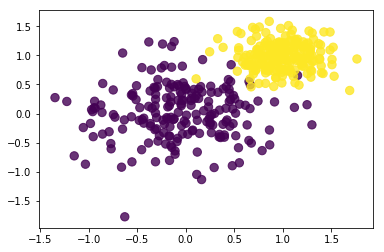

In [3]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

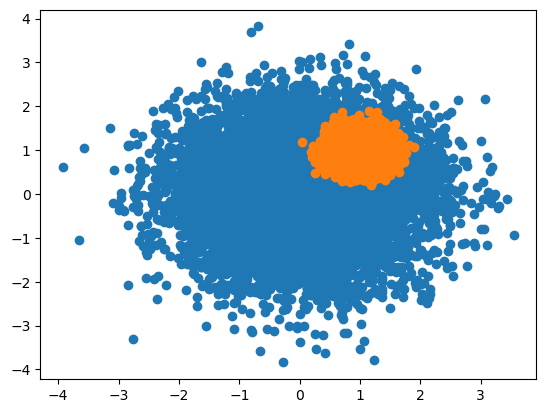

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def gauss(mean,sta_dev) : 
    return np.random.normal(mean,sta_dev,10000)

x = gauss(0,0.98)
y = gauss(0,0.98)
plt.scatter(x,y)

xx = gauss(1,0.23)
yy = gauss(1,0.23)
plt.scatter(xx,yy)

plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

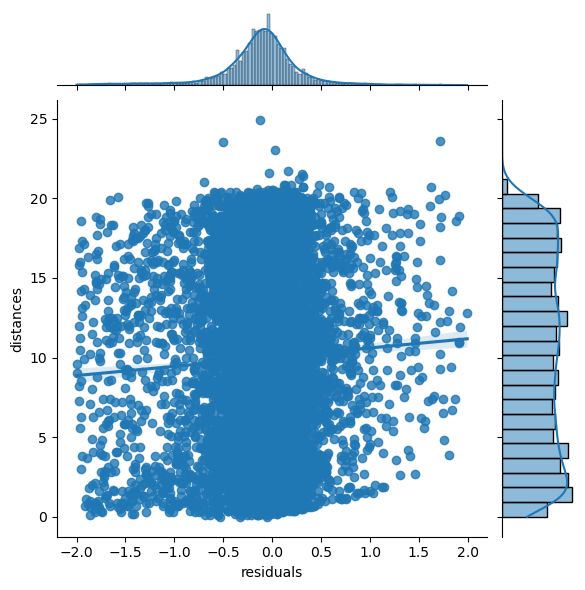

In [5]:
import pickle
import pandas as pd
import seaborn as sns

data = pd.read_pickle("/Users/demo/Downloads/residuals_261.pkl")

data_dic = data[()]
data_dic = pd.DataFrame(data_dic) 
z=data_dic['residuals']

clean_dataframe = data_dic[abs((data_dic['residuals']))<=2] 
clean_dataframe

sns.jointplot(data=clean_dataframe, x="residuals", y="distances", kind="reg")
#since there is a relation bewtween distance and residuals. So, there is a correlation between them.




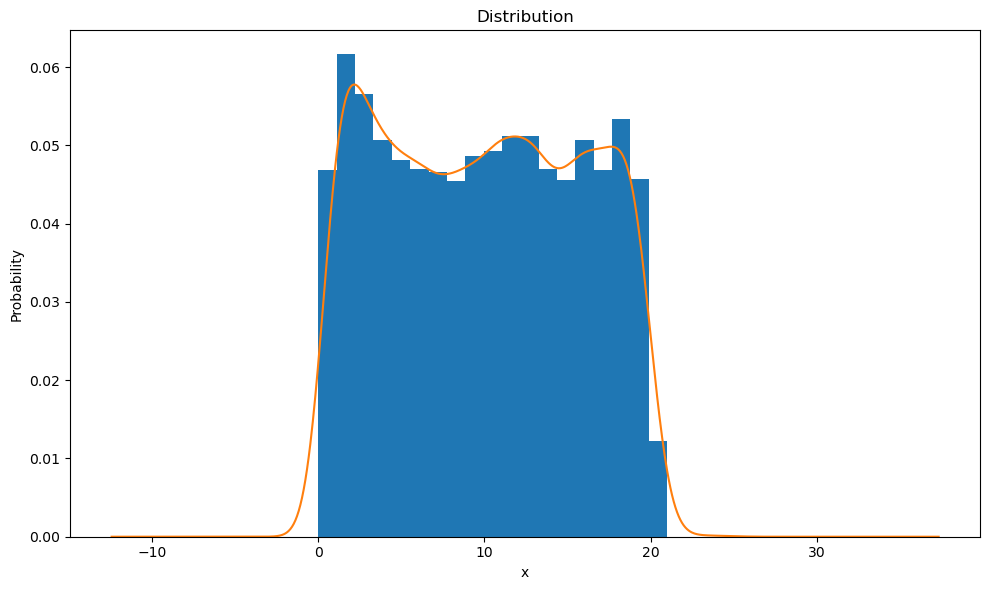

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# always useful
import numpy as np
nrnd = clean_dataframe['distances'] 
fig, ax = plt.subplots(figsize=(10, 6)) 
h, bins, _ = plt.hist(nrnd, bins=19, range=(0, +21), density=True, cumulative=False) 
nrnd.plot.kde(ax=ax, legend=False)

ax.set_title('Distribution')
ax.set_xlabel('x')
ax.set_ylabel('Probability')
fig.tight_layout()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.
